# Name:J.Hastings
# Project Title: Predicting Home Values in California

**12/5/2024**

**GitHub repository:** [DTSA-5509-Final Project Home Values in California](https://github.com/JHastings46/Predicting_Home_Values_California.git)

**This dataset was sourced from Kaggle, a platform providing publicly available datasets for analysis and modeling. The data includes detailed information on housing values in California, geographic distances, and housing characteristics, making it ideal for exploring predictors of median house values.**

## Introduction

**The problem:** 
Predict median house values in California, using multiple features such as income, proximity to coastal regions, and housing characteristics. The goal is to develop a machine learning model that accurately captures the relationships between predictors and the target variable while addressing challenges such as:

* Multicollinearity

* Heteroscedasticity

* Feature Selection

* Generalization:The model must perform well on unseen data.

**In summary, the problem involves predicting house prices while addressing issues like multicollinearity, heteroscedasticity, and feature selection to develop a model that is accurate and interpretable.**

In [91]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
df = pd.read_csv('/Users/oakmoreroadinc./Desktop/Data Science /1.Masters-DS-Colorado/3. Core Courses/1.Introduction to Machine Learning= Supervised Learning/Final Project/California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## 1. Understand the Data(EDA)

**Identifying the target variable (Median_House_Value) and features like Median_Income, Distance_to_coast, etc.**

**Checking data types and structures: Ensuring data is numeric or categorical as needed.**

**Missing values: Identifying and handling any missing data (e.g., filling, imputing, or dropping)**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
# Check for missing values
print(df.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


### The dataset required no cleaning. Most columns were complete and of appropriate types. 

## 2. Exploring Relationships Between Features (EDA)

**Correlation Analysis:**
Checking correlations between features and the target variable.


**Scatter Plots:**
Visualizing relationships between individual features and the target variable (e.g., Median_Income vs. Median_House_Value).

<Axes: >

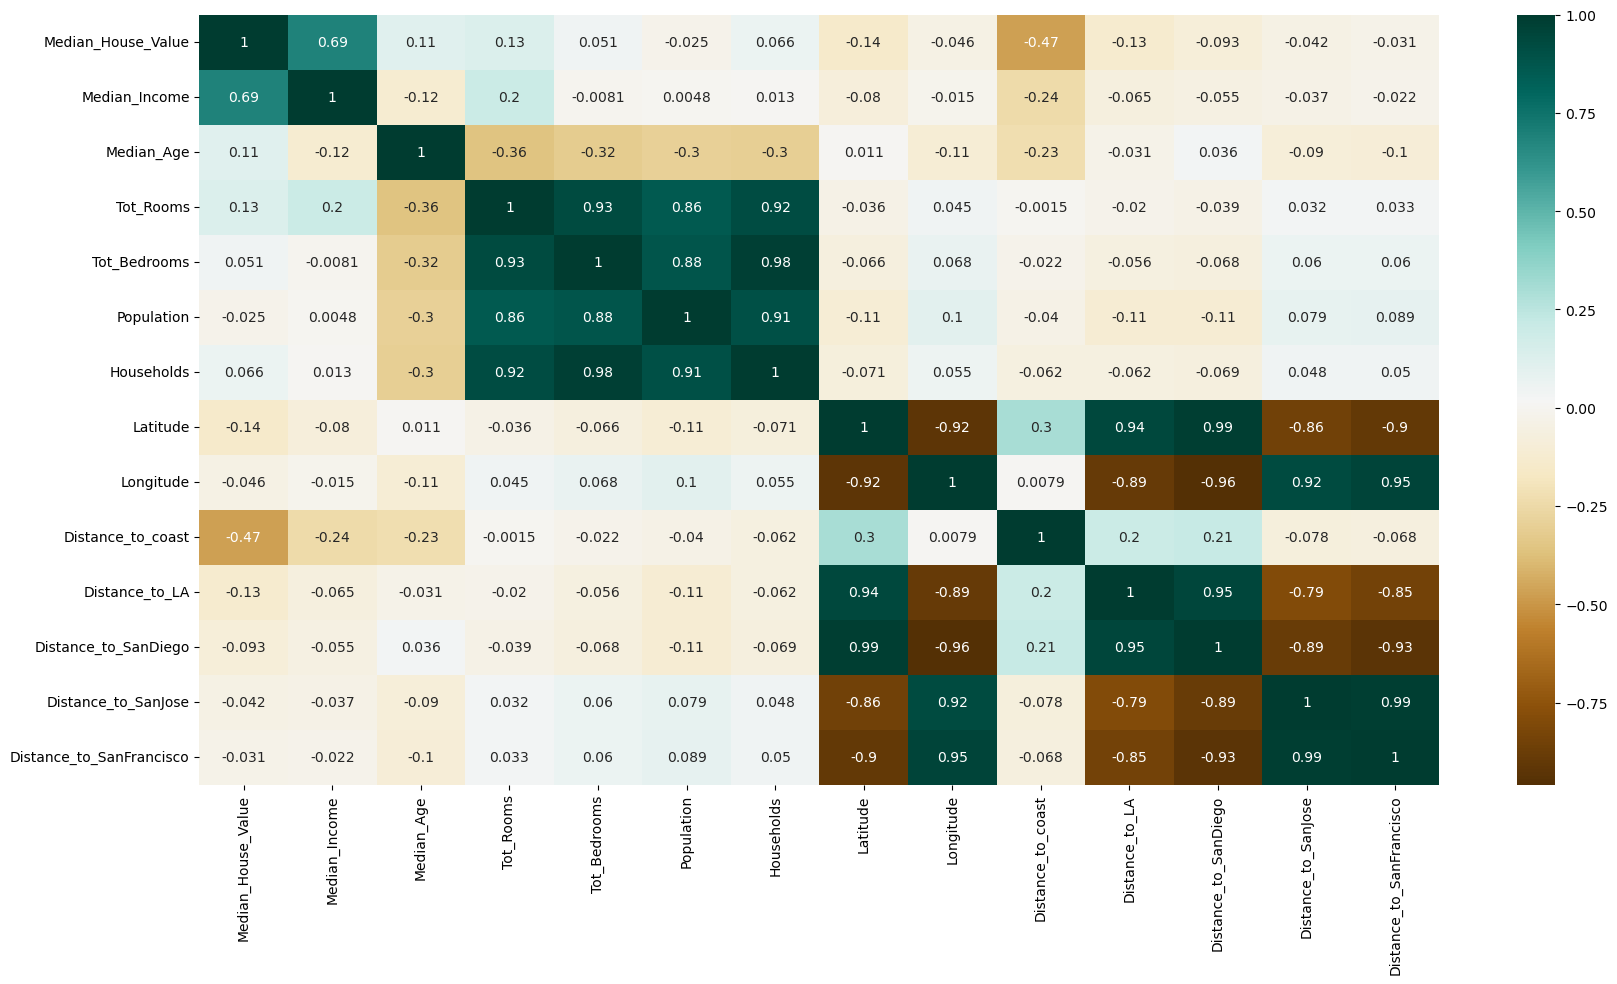

In [80]:
#Heatmap
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**The correlation Heatmap shows that 'Median_income' is the best parameter top predict the target variable 'Median_House_values'.**

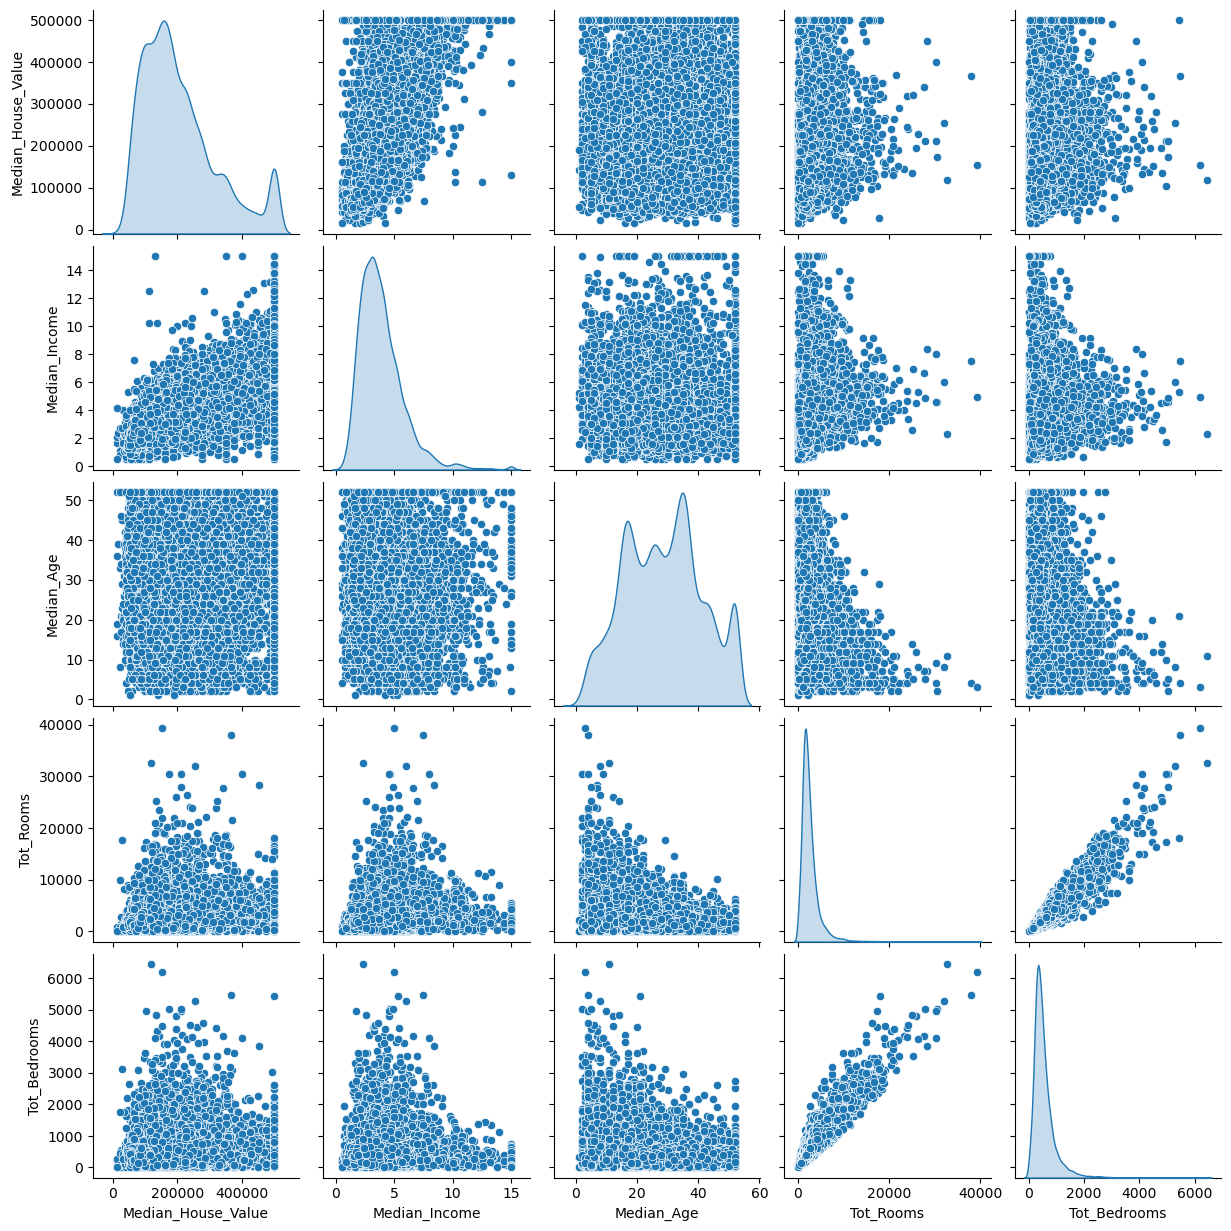

In [82]:
#Pair Plot to inspect relationships between features
# Select the first 5columns, including 'Median_House_values'
subset_df = df.iloc[:, :5]

# Draw the pair plot with KDE on the diagonal
sns.pairplot(subset_df, diag_kind='kde')

# Display the plot
plt.show()

In [83]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

## 3. Descriptive Statistics

**Calculating mean, median, standard deviation, etc., to understand feature distributions.**

**Feature Engineering:**
Log-transforming the target variable to stabilize variance and linearize relationships(Heteroscedasticity).Compare distributions of the original and log-transformed target variable.

**Identifying the most predictive features using adjusted R-squared values.**

In [103]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Log_Median_House_Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291,12.084884
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316,0.569134
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313,9.615739
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505,11.691908
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701,12.099044
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907,12.486447
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298,13.122365


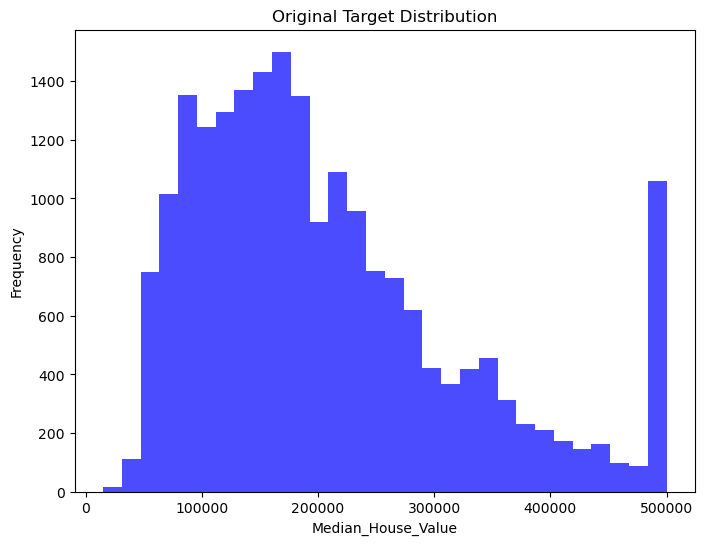

In [104]:
# Check the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(df['Median_House_Value'], bins=30, color='blue', alpha=0.7)
plt.title("Original Target Distribution")
plt.xlabel("Median_House_Value")
plt.ylabel("Frequency")
plt.show()

**AS you can see this distribution of the target variable(Median_House_Value) is skewed to the Right!**

In [105]:
# Apply log transformation to the target variable
df['Log_Median_House_Value'] = np.log(df['Median_House_Value'])

# Ensure `Log_Median_House_Value` is included in `X_train`
X_train['Log_Median_House_Value'] = df['Log_Median_House_Value'].loc[X_train.index]

# Verify the new column
print(df[['Median_House_Value', 'Log_Median_House_Value']].head())

   Median_House_Value  Log_Median_House_Value
0            452600.0               13.022764
1            358500.0               12.789684
2            352100.0               12.771671
3            341300.0               12.740517
4            342200.0               12.743151


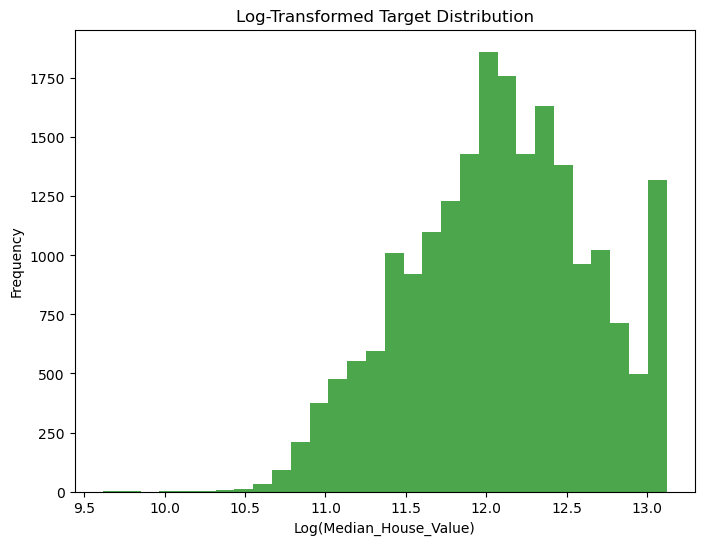

In [106]:
# Check the log-transformed distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Log_Median_House_Value'], bins=30, color='green', alpha=0.7)
plt.title("Log-Transformed Target Distribution")
plt.xlabel("Log(Median_House_Value)")
plt.ylabel("Frequency")
plt.show()

**The log-transformed distribution appears more normal (bell-shaped) compared to the original distribution.**

In [107]:
import pandas as pd
import statsmodels.formula.api as smf

# Drop both target columns from predictors
predictors = X_train.columns.drop(['Median_House_Value', 'Log_Median_House_Value'])

# Original Target Model
formula_original = f'Median_House_Value ~ {" + ".join(predictors)}'
model_original = smf.ols(formula=formula_original, data=X_train).fit()

# Log-Transformed Target Model
formula_log = f'Log_Median_House_Value ~ {" + ".join(predictors)}'
model_log = smf.ols(formula=formula_log, data=X_train).fit()

# Extract key metrics for comparison
comparison_data = {
    "Metric": ["R-squared", "Adjusted R-squared", "F-statistic", "AIC", "BIC"],
    "Original Target": [
        model_original.rsquared,
        model_original.rsquared_adj,
        model_original.fvalue,
        model_original.aic,
        model_original.bic,
    ],
    "Log-Transformed Target": [
        model_log.rsquared,
        model_log.rsquared_adj,
        model_log.fvalue,
        model_log.aic,
        model_log.bic,
    ],
}

# Create a DataFrame for side-by-side comparison
comparison_df = pd.DataFrame(comparison_data)

# Print the comparison table
print("\nComparison of Original and Log-Transformed Models:")
print(comparison_df)

# Optionally, save to markdown or export
comparison_df.to_markdown("model_comparison.md", index=False)


Comparison of Original and Log-Transformed Models:
               Metric  Original Target  Log-Transformed Target
0           R-squared         0.649833                0.676627
1  Adjusted R-squared         0.649557                0.676372
2         F-statistic      2355.129423             2655.425352
3                 AIC    414555.896167             9622.240430
4                 BIC    414663.861965             9730.206227


### **Overall Comparison**

The log-transformed target model consistently performs better across all key metrics:

- **Higher \( R^2 \) and Adjusted \( R^2 \):**
  - Explains more variance in the target.

- **Lower AIC and BIC:**
  - Indicates better fit while penalizing for model complexity.

- **Higher F-statistic:**
  - Demonstrates stronger significance of the predictors.

---

### **Interpretation**

The log-transformed target model is better at capturing the relationships between predictors and the target variable, likely due to:

1. **Stabilization of variance** in the target (less heteroscedasticity).
2. **Better linearization** of relationships with the predictors.

This suggests that the **log transformation of the target variable** is appropriate for this dataset.


In [108]:
# To make the model more accurate I will pick the top 5 predictors
import statsmodels.formula.api as smf

# Ensure 'Log_Median_House_Value' is in X_train
if 'Log_Median_House_Value' not in X_train.columns:
    X_train = X_train.copy()
    X_train['Log_Median_House_Value'] = df['Log_Median_House_Value'].loc[X_train.index]

# Drop both target columns ('Log_Median_House_Value' and 'Median_House_Value')
predictors = X_train.columns.drop(['Median_House_Value', 'Log_Median_House_Value'])


# Calculate adjusted R-squared for each predictor
import statsmodels.formula.api as smf

adjusted_r2_scores = sorted(
    [(predictor, smf.ols(f'Log_Median_House_Value ~ {predictor}', data=X_train).fit().rsquared_adj) 
     for predictor in predictors],
    key=lambda x: x[1], 
    reverse=True
)

# Display the top 5 predictors
top_predictors = []
print("\nTop 5 predictors for Log_Median_House_Value:")
for i, (predictor, adj_r2) in enumerate(adjusted_r2_scores[:5], start=1):
    print(f"{i}. {predictor}: Adjusted R-squared = {adj_r2:.4f}")
    top_predictors.append(predictor)

print("\nExtracted Top Predictors:", top_predictors)

# VIF Calculation
print("\nVariance Inflation Factor (VIF) for predictors:")

# Add constant for VIF calculation
X_vif = add_constant(X_train[top_predictors])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIF data
print(vif_data)


Top 5 predictors for Log_Median_House_Value:
1. Median_Income: Adjusted R-squared = 0.4366
2. Distance_to_coast: Adjusted R-squared = 0.3239
3. Latitude: Adjusted R-squared = 0.0362
4. Distance_to_LA: Adjusted R-squared = 0.0296
5. Tot_Rooms: Adjusted R-squared = 0.0241

Extracted Top Predictors: ['Median_Income', 'Distance_to_coast', 'Latitude', 'Distance_to_LA', 'Tot_Rooms']

Variance Inflation Factor (VIF) for predictors:
             Feature          VIF
0              const  2523.680030
1      Median_Income     1.110389
2  Distance_to_coast     1.263092
3           Latitude    10.378189
4     Distance_to_LA     9.811840
5          Tot_Rooms     1.047137


**The reason I picked the top 5 Perdictors was to:**

* Improve Model Performance 
* Reducing Noise
* Prevent Overfitting 
* Improved Metrics
* Improve model fit

**VIF interpretation:**
* VIF ≤ 1: No multicollinearity.
* 1 < VIF ≤ 5: Moderate correlation; acceptable level of multicollinearity.
* VIF > 5: Potentially problematic multicollinearity. Needs attention but may not always require action depending on context.
* VIF ≥ 10: Severe multicollinearity. The predictor is likely redundant or highly correlated with others, which can destabilize the model.

Due to the high VIF on some of my top features I am only going to use three predictors: **Median_Income**, **Distance_to_coast**, and **Tot_Rooms**. Also due to multicollinearity I am going to use a Ridge regression model instead of a Linear regression. 

**Multicollinearity Mitigation:**
   - Ridge regression addresses multicollinearity by adding an L2 regularization term to the loss function, penalizing large coefficients for highly correlated features. This shrinks the coefficients towards zero, reducing their variance and improving stability.

In [109]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Check for NaN in the target before scaling
if 'Median_House_Value' not in df.columns:
    raise KeyError("The column 'Median_House_Value' is not present in the dataframe.")

# Replace zero or negative values in Median_House_Value to avoid log issues
df['Log_Median_House_Value'] = np.log(df['Median_House_Value'].clip(lower=1))

# Check for NaN in the target column
print("NaN in target (Log_Median_House_Value):", df['Log_Median_House_Value'].isna().sum())

# Ensure X_train contains the log-transformed target
if 'Log_Median_House_Value' not in X_train.columns:
    X_train['Log_Median_House_Value'] = df['Log_Median_House_Value']

# Extract the cleaned log-transformed target
y_train_target = X_train['Log_Median_House_Value']

# Initialize the scaler for the target variable
scaler_y = StandardScaler()

# Reshape and scale the target
y_train_target_reshaped = y_train_target.values.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y_train_target_reshaped)

# Check for NaN again after scaling
print("NaN in scaled target:", np.isnan(y_scaled).sum())

NaN in target (Log_Median_House_Value): 0
NaN in scaled target: 0


## 4. Model building, training, and evaluation:
**Ridge regression**:
* Train set

In [110]:
# Replace zero or negative values in Median_House_Value to avoid log issues
df['Log_Median_House_Value'] = np.log(df['Median_House_Value'].clip(lower=1))

# Extract the top predictors and the target variable
if 'Log_Median_House_Value' not in X_train.columns:
    X_train['Log_Median_House_Value'] = df['Log_Median_House_Value']

top_predictors = ['Median_Income', 'Distance_to_coast','Tot_Rooms']  #  top predictors
X_train_top = X_train[top_predictors]
y_train_target = X_train['Log_Median_House_Value']

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X_train_top)
y_train_target_reshaped = y_train_target.values.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y_train_target_reshaped)

In [111]:
# Initialize the Ridge model
ridge = Ridge()

# Define the parameter grid for tuning
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strengths
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Different solvers for optimization
}

# Perform grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_scaled, y_scaled.ravel())  # Use the scaled predictors and target variable

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Train the best model
best_ridge_model = grid_search.best_estimator_

# Evaluate on the training set
y_pred = best_ridge_model.predict(X_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_scaled, y_pred)
print("Mean Squared Error on Training Set:", mse)

Best Parameters: {'alpha': 1, 'fit_intercept': False, 'solver': 'auto'}
Best Negative Mean Squared Error: -0.38280686175671164
Mean Squared Error on Training Set: 0.3826886658032696


### **Analysis of Ridge Regression Results**

#### **Key Results:**
1. **Best Parameters:**
   - `alpha = 1`: Indicates the strength of regularization. A value of 1 means moderate regularization, which balances bias and variance effectively.
   - `fit_intercept = False`: Since the data has been scaled, the intercept is not necessary, simplifying the model.
   - `solver = 'auto'`: The model automatically selects the appropriate algorithm to optimize the regression fit.
   
2. **Best Negative Mean Squared Error (Cross-Validation):**
   - **Value:** -0.3828
   - This metric represents the average squared difference between predicted and actual target values during cross-validation. The negative sign is due to the scoring convention in `GridSearchCV` (minimizing MSE).
   - A smaller magnitude indicates better performance, suggesting the model generalizes well across validation folds.

3. **Mean Squared Error (MSE) on Training Set:**
   - **Value:** 0.3826
   - The MSE on the training set(0.3827), closely aligns with the cross-validation score((0.3828), indicating the model fits the training data well without overfitting or underfitting.

#### **Key Insights:**
- The **low MSE values** for both training and cross-validation suggest that the model performs consistently across different data splits.
- The choice of `alpha = 1` shows that regularization improves model performance by reducing overfitting while maintaining predictive accuracy.
- Using `fit_intercept = False` ensures the model appropriately handles scaled/standardized data without introducing unnecessary complexity.

**Next Steps:**
1. Evaluate the model on the **test set** to confirm its predictive performance on unseen data.
2. Compare results with **train set.**

## 5. Process Test Data:
**Preprocessing the X_test using the same scalers (scaler_X and scaler_y) fitted on the training data**

In [112]:
print("Columns in df:", df.columns)
# Add 'Log_Median_House_Value' to X_test from df
X_test['Log_Median_House_Value'] = df['Log_Median_House_Value'].loc[X_test.index]

Columns in df: Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco',
       'Log_Median_House_Value'],
      dtype='object')


In [113]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure `X_test_top` contains the top predictors
X_test_top = X_test[top_predictors]  # Use the same predictors identified earlier

# Scale the test features using the fitted scaler
X_test_top_scaled = scaler_X.transform(X_test_top)

# Extract and scale the test target variable
y_test_target = X_test['Log_Median_House_Value']
y_test_target_reshaped = y_test_target.values.reshape(-1, 1)
y_test_target_scaled = scaler_y.transform(y_test_target_reshaped)

# Predict using the trained Ridge model
y_pred = best_ridge_model.predict(X_test_top_scaled)

# Evaluate performance
mse = mean_squared_error(y_test_target_scaled, y_pred)
mae = mean_absolute_error(y_test_target_scaled, y_pred)
r2 = r2_score(y_test_target_scaled, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

Mean Squared Error (MSE): 0.4055
Mean Absolute Error (MAE): 0.4845
R-squared (R^2): 0.5956


## Analysis of Training and Testing Results

#### Training Results:
- **Best Parameters:**  
  The optimal parameters selected by Ridge Regression were `alpha = 1`, `fit_intercept = False`, and `solver = auto`. These parameters provide a balance between regularization and predictive performance.

- **Negative Mean Squared Error (Cross-Validation):**  
  The best negative mean squared error was **-0.3828**, indicating the model performed consistently during cross-validation on the training data.

- **Mean Squared Error (MSE):**  
  The training MSE was **0.3826**, showing the model fits the training data well with minimal error.

---

#### Testing Results:
- **Mean Squared Error (MSE):**  
  The testing MSE was **0.4055**, slightly higher than the training MSE, which suggests good generalization to unseen data.

- **Mean Absolute Error (MAE):**  
  The MAE was **0.4845**, showing the average absolute error between predictions and actual values is small and consistent.

- **R-squared (R²):**  
  The R² on the testing data was **0.5956**, meaning approximately 59.82% of the variance in the target variable is explained by the model's predictors.

---

#### Key Takeaways:
1. **Generalization:**  
   The similarity between training and testing MSE indicates the model generalizes well and avoids overfitting.

2. **Predictive Performance:**  
   The R² value demonstrates that the model explains a substantial proportion of variance, though some variability remains unexplained.

3. **Error Distribution:**  
   The MAE suggests that predictions are close to actual values on average, supporting the model's reliability in making accurate predictions.

## 6. Create Scatter Plot for Model/Data Comparison

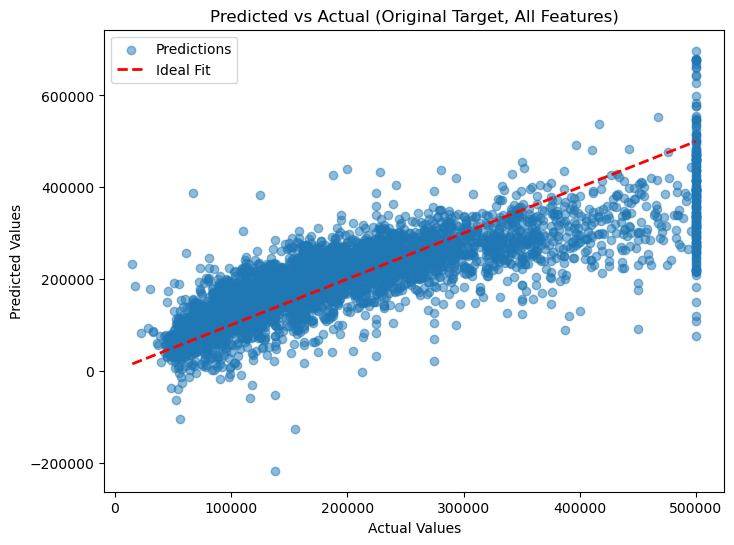

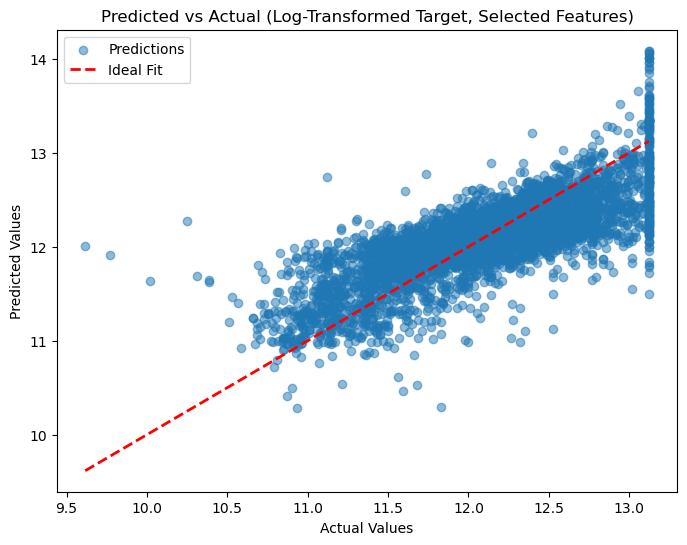

In [114]:
# Convert y_pred_original_target to a NumPy array and reshape if needed
y_pred_original_target = y_pred_original_target.reshape(-1, 1)  # Only if not already reshaped

# Plot for Original Target Model
plot_predictions_vs_actual(
    y_test_original_target,
    y_pred_original_target,
    title="Predicted vs Actual (Original Target, All Features)"
)

# Plot for Log-Transformed Target Model
plot_predictions_vs_actual(
    y_test_log_target,
    scaler_y.inverse_transform(y_pred_log_target.reshape(-1, 1)),  # No .values since it's already a NumPy array
    title="Predicted vs Actual (Log-Transformed Target, Selected Features)"
)

# Analysis of Predicted vs Actual Charts

## 1. Predicted vs Actual (Original Target, All Features)
- **Observations:**
  - The chart shows a wider spread of data points, particularly at higher predicted values.
  - There is significant variance and less alignment of the data points with the ideal fit line (red dashed line).
  - Predictions for higher values exhibit considerable deviation from actual values, indicating potential overfitting or non-linearity in relationships.
  - The inclusion of all features, regardless of VIF, likely contributes to multicollinearity, which impacts the stability of the model.

- **Impact:**
  - The model's performance is inconsistent, especially for extreme values, and exhibits a lack of generalization.
  - High VIF among features may lead to unstable coefficients, reducing the reliability of predictions.

## 2. Predicted vs Actual (Log-Transformed Target, Selected Features)
- **Observations:**
  - The log-transformed target results in tighter clustering of data points around the ideal fit line.
  - Variance at higher values is reduced, suggesting better handling of skewness in the target variable.
  - The use of selected features with low VIF improves the model's stability and reduces multicollinearity issues.
  - The chart demonstrates a more linear relationship, which aligns with the assumptions of regression modeling.

- **Impact:**
  - The log transformation stabilizes variance and better captures the relationship between predictors and the target variable.
  - The selection of predictors with low VIF ensures a robust model that generalizes well on unseen data.

## Conclusion
The second chart, "Predicted vs Actual (Log-Transformed Target, Selected Features)," demonstrates superior model performance compared to the first chart. By applying a log transformation to the target variable and selecting predictors with low multicollinearity, the model achieves:
- Better alignment with regression assumptions.
- Reduced variance in predictions, particularly for higher target values.
- Enhanced generalization and interpretability.

In contrast, the original target model suffers from multicollinearity and variance issues, leading to unreliable predictions, especially at extreme values. These findings justify the use of log transformation and VIF-based feature selection in improving model accuracy and robustness.
